In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pylab as py
from matplotlib import pyplot as plt
from scipy import linalg
%matplotlib inline

In [2]:
from sklearn.covariance import GraphLasso as GL

In [3]:
def estimatePhi(S, rho):
    """
        S is the empirical covariance matrix.
    """
    assert S.shape[0] == S.shape[1], "Matrix must be square"
    n = S.shape[0]
    
    Phi = cvx.Variable(n, n)
    
    obj = cvx.Minimize(-(cvx.log_det(Phi) - cvx.trace(S*Phi) - rho*cvx.norm(Phi,1)))
    constraints = []

    prob = cvx.Problem(obj,constraints)
    prob.solve(solver=cvx.SCS, eps=1e-5)
    return Phi.value

In [4]:
def GroupGraphicLasso(S, rho, groups):
    """
        S is the empirical covariance matrix.
    """
    assert S.shape[0] == S.shape[1], "Matrix must be square"
    n = S.shape[0]
    
    Phi = cvx.Variable(n, n)
    
    group_pennal=[]
    for group in groups:
        group_pennal.append(cvx.norm(Phi[group,group],"fro"))
    obj = cvx.Minimize(-(cvx.log_det(Phi) - cvx.trace(S*Phi) - rho*sum(group_pennal)))
    constraints = []

    prob = cvx.Problem(obj,constraints)
    prob.solve(solver=cvx.SCS, eps=1e-5)
    return Phi.value

In [5]:
def set_zero(data):
    '''to visualize clearly, we set all diagonal element to 0'''
    z=np.zeros(data.shape)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if i!=j:
                z[i,j]=data[i,j]
    return z
def add_group(data,group):
    '''add group to toy data'''
    for i in group:
        for j in group:
            if i==j:
                pass
            else:
                data[i,j] += 0.25
def createToyData(ranNum=20,
                  size=(100,20),
                 groups=[np.array([0,1,2,3,4,5]),np.array([0,1,2]),np.array([3,4,5]),np.array([6,7,8,9])]
                 ):
    '''creat toy test data , parameter:
            ranNum: random state
            size: (num1,num2) num1 mean examples, num2 means features.
            groups: we require groups in a list, each element is a numpy.array() object example:[np.array([0,1,2,3,4,5])]
        this function return :
            X: toy data X
            prec: ground truth precision matrix
    '''
    n_samples = size[0]
    n_features = size[1]
    ##random state
    prng = np.random.RandomState(ranNum)
    prec = np.zeros(shape=(n_features,n_features))
    for i in range(n_features):
        prec[i,i]+=1.

    #groups=[np.array([0,1,2,3,4,5]),np.array([0,1,2]),np.array([3,4,5]),np.array([6,7,8,9]),np.array([6,7]),np.array([8,9])]
    for g in groups:
        add_group(prec,g)
    cov = linalg.inv(prec)
    ##using random state to create X
    X = prng.multivariate_normal(np.zeros(n_features), cov, size=n_samples)
    X -= X.mean(axis=0)
    X /= X.std(axis=0)
    return X,prec
groups=[np.array([0,1,2,3,4,5]),np.array([0,1,2]),np.array([3,4,5]),np.array([6,7,8,9]),np.array([6,7]),np.array([8,9]),
       np.array([10,11,12,13,14,15]),np.array([10,11,12]),np.array([13,14,15]),np.array([16,17,18,19]),np.array([16,17]),
        np.array([18,19]),np.array([6,7,8,9,10,11,12,13,14,15])]
groups1=[np.array([0,1]),np.array([1,4]),np.array([4,5]),np.array([4,7])]
X,prec=createToyData(groups=groups)

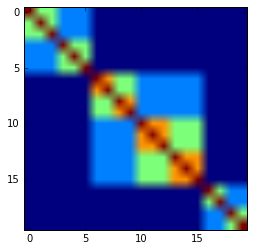

In [6]:
plt.imshow(prec)
plt.show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:24: RuntimeWarning: covariance is not positive-semidefinite.


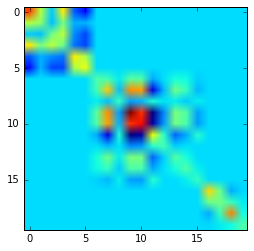

(100L, 20L)


In [63]:
## skleanr spd data generation
from sklearn.datasets import make_spd_matrix as spd
def addOneGroup(one_group):
#     print "len:",len(one_group)
    return spd(len(one_group))
def stick(group,groupMatrix,X):
#     print type(group)
#     print type(groupMatrix)
#     print X.shape
#     print [group[i] for i in xrange(groupMatrix.shape[1])]
    for i in xrange(groupMatrix.shape[0]):
        for j in xrange(groupMatrix.shape[1]):
            X[group[i],group[j]] = groupMatrix[i,j]
def createToyData_spd(ranNum=20,size=(100,20),
                 groups=[np.array([0,1,2,3,4,5]),np.array([0,1,2]),np.array([3,4,5]),np.array([6,7,8,9])]):
    prng = np.random.RandomState(ranNum)
    n_samples,n_features=size[0],size[1]
    #prec = spd(n_dim = size[1], random_state = prng)
    prec = np.zeros((n_features,n_features))
    for g in groups:
        onegroup=addOneGroup(g)
        stick(g,onegroup,prec)
    cov = linalg.inv(prec)
    X = prng.multivariate_normal(np.zeros(size[1]), cov, size=size[0])
    X -= X.mean(axis=0)
    X /= X.std(axis=0)
    return X,prec
groups=[np.array([0,1,2,3,4,5]),np.array([0,1,2]),np.array([3,4,5]),np.array([6,7,8,9]),np.array([6,7]),np.array([8,9]),
       np.array([10,11,12,13,14,15]),np.array([10,11,12]),np.array([13,14,15]),np.array([16,17,18,19]),np.array([16,17]),
        np.array([18,19]),np.array([6,7,8,9,10,11,12,13,14,15])]
groups1=[np.array([0,1,2,3,4,5,6,7,8,9]),np.array([10,11,12,13,14,15,16,17,18,19])]
groups2=[np.array([0,1,2,3,4,15,16,17,18,19]),np.array([10,11,12,13,14,5,6,7,8,9])]
X,prec=createToyData_spd(groups=groups)
plt.imshow(prec)
plt.show()
print X.shape

In [57]:
pennal_list=np.arange(0.001,0.5,0.08)
print pennal_list
print len(pennal_list)

[ 0.001  0.081  0.161  0.241  0.321  0.401  0.481]
7


In [52]:
ggl_list=[]
gl_list=[]
for pennal in pennal_list:
    ###grouped graphic lasso
    S=np.cov(X.T)
    print S.shape
    test=GroupGraphicLasso(S,pennal*5,groups1)
    ggl_list.append(test)
    ###graphic lasso
    model = GL(alpha=pennal)
    model.fit(X)
    #cov_ = model.covariance_
    prec_ = model.precision_
    gl_list.append(prec_)

(20L, 20L)
(20L, 20L)
(20L, 20L)
(20L, 20L)
(20L, 20L)
(20L, 20L)
(20L, 20L)


In [53]:
print len(ggl_list)
for i in ggl_list:
    print i.shape

7
(20L, 20L)
(20L, 20L)
(20L, 20L)
(20L, 20L)
(20L, 20L)
(20L, 20L)
(20L, 20L)


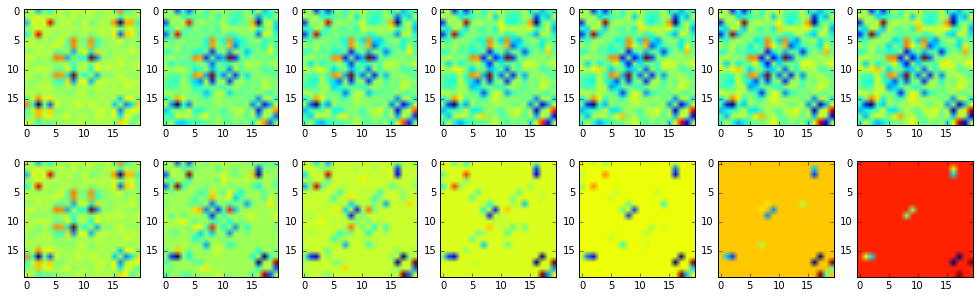

In [62]:
pennelty_number=len(ggl_list)
fig,ax = plt.subplots(ncols=pennelty_number,nrows=2)
for i in range(2):
    for j in range(pennelty_number):
            if i<1:
                value=set_zero(ggl_list[j])
                ax[i][j].imshow(value)
            else:
                value=set_zero(gl_list[j])
                ax[i][j].imshow(value)
fig.set_size_inches(17,5)
plt.show()